## **Inteligencia Artificial y Aprendizaje Automático**

## **Carlos Alvarez**

### Prof Luis Eduardo Falcón Morales

**Rotación de Personal - IBM**

#### **Nombre y matrícula:**

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [188]:
# Incluye aquí todas las librerías que consideres necesarias:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay


# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++
La rotación de personal es un problema extendido en empresas de todos los tamaños y sectores y a menudo se subestima como un factor de pérdida económica constante. Aunque muchas organizaciones reconocen los problemas asociados, no todas comprenden las variables y costos directos e indirectos que conlleva. Esta falta de claridad lleva a que algunas empresas lleguen a normalizar la rotación de su capital humano como una pérdida operativa inevitable.

Por otro lado, los departamentos de Recursos Humanos se han dado cuenta de la importancia de medir tanto el impacto cualitativo, como el cuantitativo de este problema. Por eso es crucial comprender las variables involucradas en el reclutamiento, selección, contratación e inducción de nuevos empleados para cuantificar el costo real de reemplazarlos. Esto incluye no solo los gastos directos, sino también los costos ocultos que afectan la experiencia del cliente.

Abordar la rotación desde una perspectiva diferente, reconociendo a la fuerza laboral como los primeros clientes, puede revelar problemas más profundos de satisfacción y vinculación con la marca.

Referencia:
Wellhub. (s.f.). Rotación de personal: ¿Cómo disminuir el porcentaje de rotación en tu empresa? Wellhub. https://wellhub.com/es-mx/blog/adquisicion-y-retencion-del-talento/rotacion-de-personal-como-disminuir-el-porcentaje-de-rotacion-en-tu-empresa/


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [189]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNA_TEC_DE_MONTERREY/Inteligencia Artificial y Aprendizaje Automatico_TC4030/Modulo 2/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


El armumento "include all" indica que se deben de incluir en la tabla todos las variables, ya sean numericas o categóricas, sin el argumento "include all" se incluyen en la tabla por default solo variables numéricas.


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: Solo existe un unico valor para esta columna que es  "Y" y se repite en las 1470 filas, por lo que todos son mayores a 18 y no tiene caso incluir esta variable en el modelo.

**b)	EmployeeCount**: Solo existe un unico valor en todas las filas el cual es de tipo entero con valor 1, no proporciona información para predecir un valor en el modelo.

**c)	StandardHours**: Solo existe un unico valor en todas las filas el cual es de tipo entero con valor 80, no proporciona información para predecir un valor en el modelo.

**d)	EmployeeNumber**: El numero del empleado no tiene nada que ver con una razón para cambiar de empleo, debido a que es un valor numérico provocará ruido en el modelo, por lo que es necesario eliminar esta columna.

++++++++ Termina la sección de agregar texto. +++++++++++




In [190]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

#### **NOTA: Utiliza semillas en cada función de partición, para permitir la repetibilidad de tu modelo y poder evaluarlo de mejor majera.**

In [191]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++

# Separando las características (X) y la variable objetivo (y)
X = df.drop(columns=['Attrition'],axis=1)
y = df['Attrition']

# División 70% entrenamiento, 30% temporal (validación + prueba)
Xtrain, Xvt, ytrain, yvt = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# División 15% validación, 15% prueba a partir del 30% restante
Xval, Xtest, yval, ytest = train_test_split(Xvt, yvt, test_size=0.50, stratify=yvt, random_state=42)

# Mostrar las dimensiones de los conjuntos
print(f'Entrenamiento: Xtrain:{Xtrain.shape}, Ytrain:{ytrain.shape}')
print(f'Validación: Xval:{Xval.shape}, Yval:{yval.shape}')
print(f'Prueba: Xtest:{Xtest.shape}, Ytest:{ytest.shape}')


# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Entrenamiento: Xtrain:(1029, 30), Ytrain:(1029,)
Validación: Xval:(220, 30), Yval:(220,)
Prueba: Xtest:(221, 30), Ytest:(221,)


# **Ejercicio 6:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [192]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

# Crear el codificador
encoder = LabelEncoder()

# Ajusta el transformador al conjunto de entrenamiento

encoder.fit(ytrain)

# Aplicar el encoder a las variables de salida evitando data leakage
ytrainT = encoder.transform(ytrain)
yvalT = encoder.transform(yval)
ytestT = encoder.transform(ytest)

# Convertir a dataframe
ytrainT = pd.DataFrame(ytrainT, columns=['Attrition'])
yvalT = pd.DataFrame(yvalT, columns=['Attrition'])
ytestT = pd.DataFrame(ytestT, columns=['Attrition'])

# Calcular proporciones de cada nivel en ytrainT
proporciones = ytrainT.value_counts(normalize=True)

if proporciones.max() > 0.8:
    print("Se puede considerar un problema de datos desbalanceados, ya que hay clases con mas del 80% de los datos.")
else:
    print("Los datos están balanceados.")

# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

print('Porcentaje de datos en cada clase de entrenamiento - Attrition:', ytrainT['Attrition'].value_counts() / ytrainT.shape[0])

Se puede considerar un problema de datos desbalanceados, ya que hay clases con mas del 80% de los datos.
Porcentaje de datos en cada clase de entrenamiento - Attrition: Attrition
0    0.838678
1    0.161322
Name: count, dtype: float64


# **Ejercicio 7:**


#### **Incluye a continuación el análisis gáfico y describtivo que consideres adecuado. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

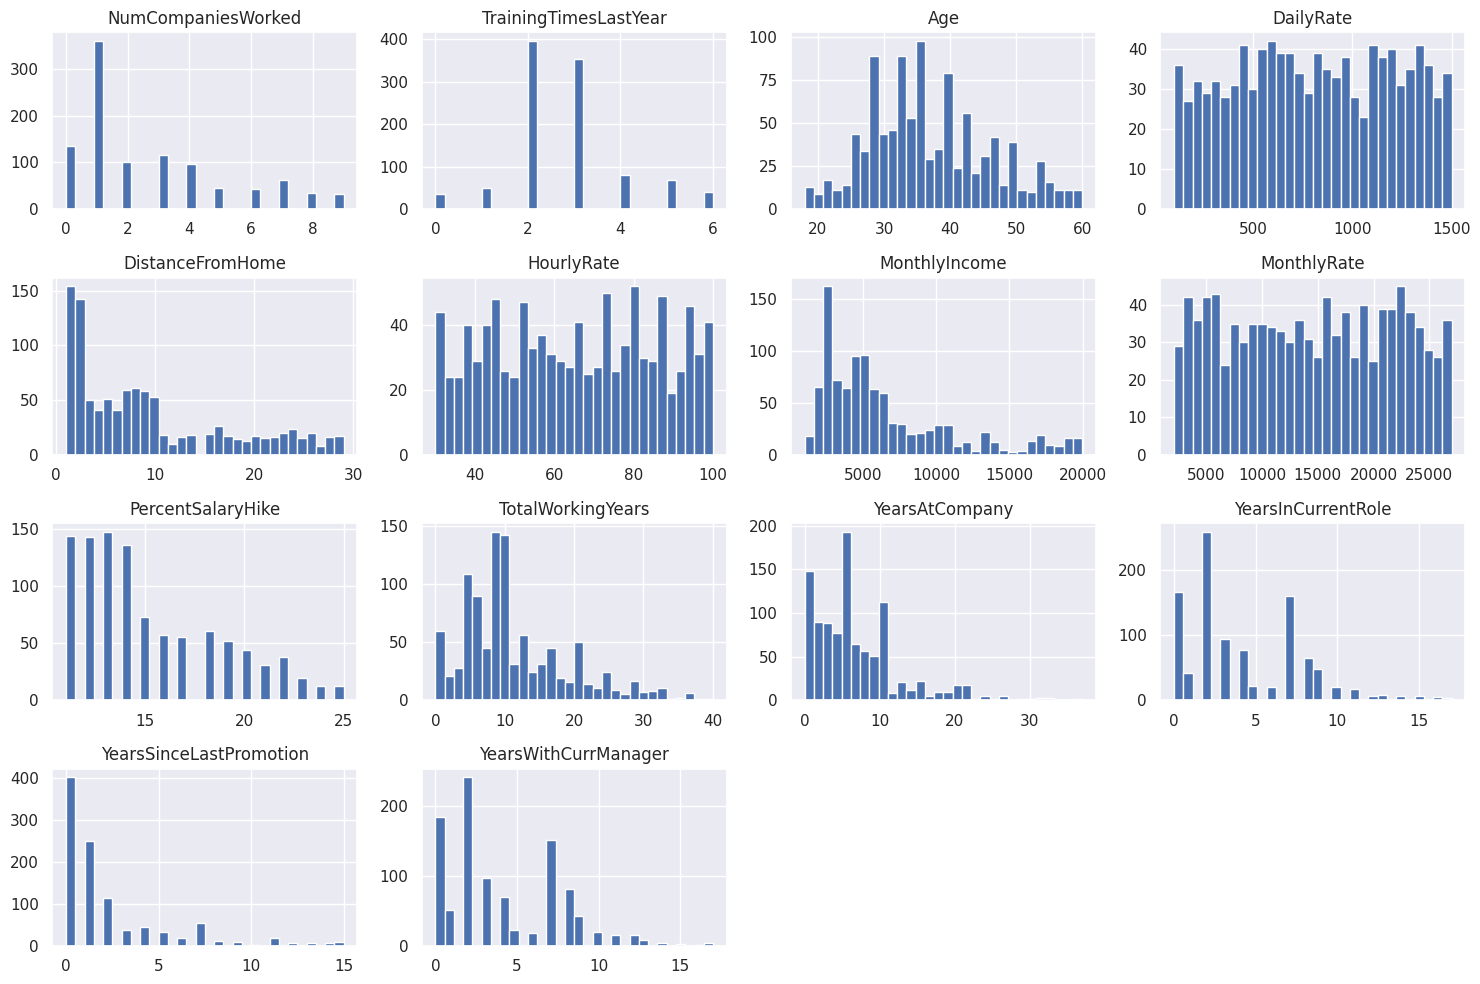

In [193]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres conveniente.

# Filtrar las columnas numéricas
Variables_numericas = [ 'NumCompaniesWorked', 'TrainingTimesLastYear', 'Age',
                        'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
                        'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Crear un histograma para cada variable numérica
Xtrain[Variables_numericas].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

#Las variables numéricas tienen diferentes escalas y en su mayoría tienen sesgo positivo.
#Para las variables Numéricas se sugiere aplicar escalamiento Min-Max y posteriormente Box-Cox para reducir sesgos, esto debido a que todos los valores son mayores a cero.


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



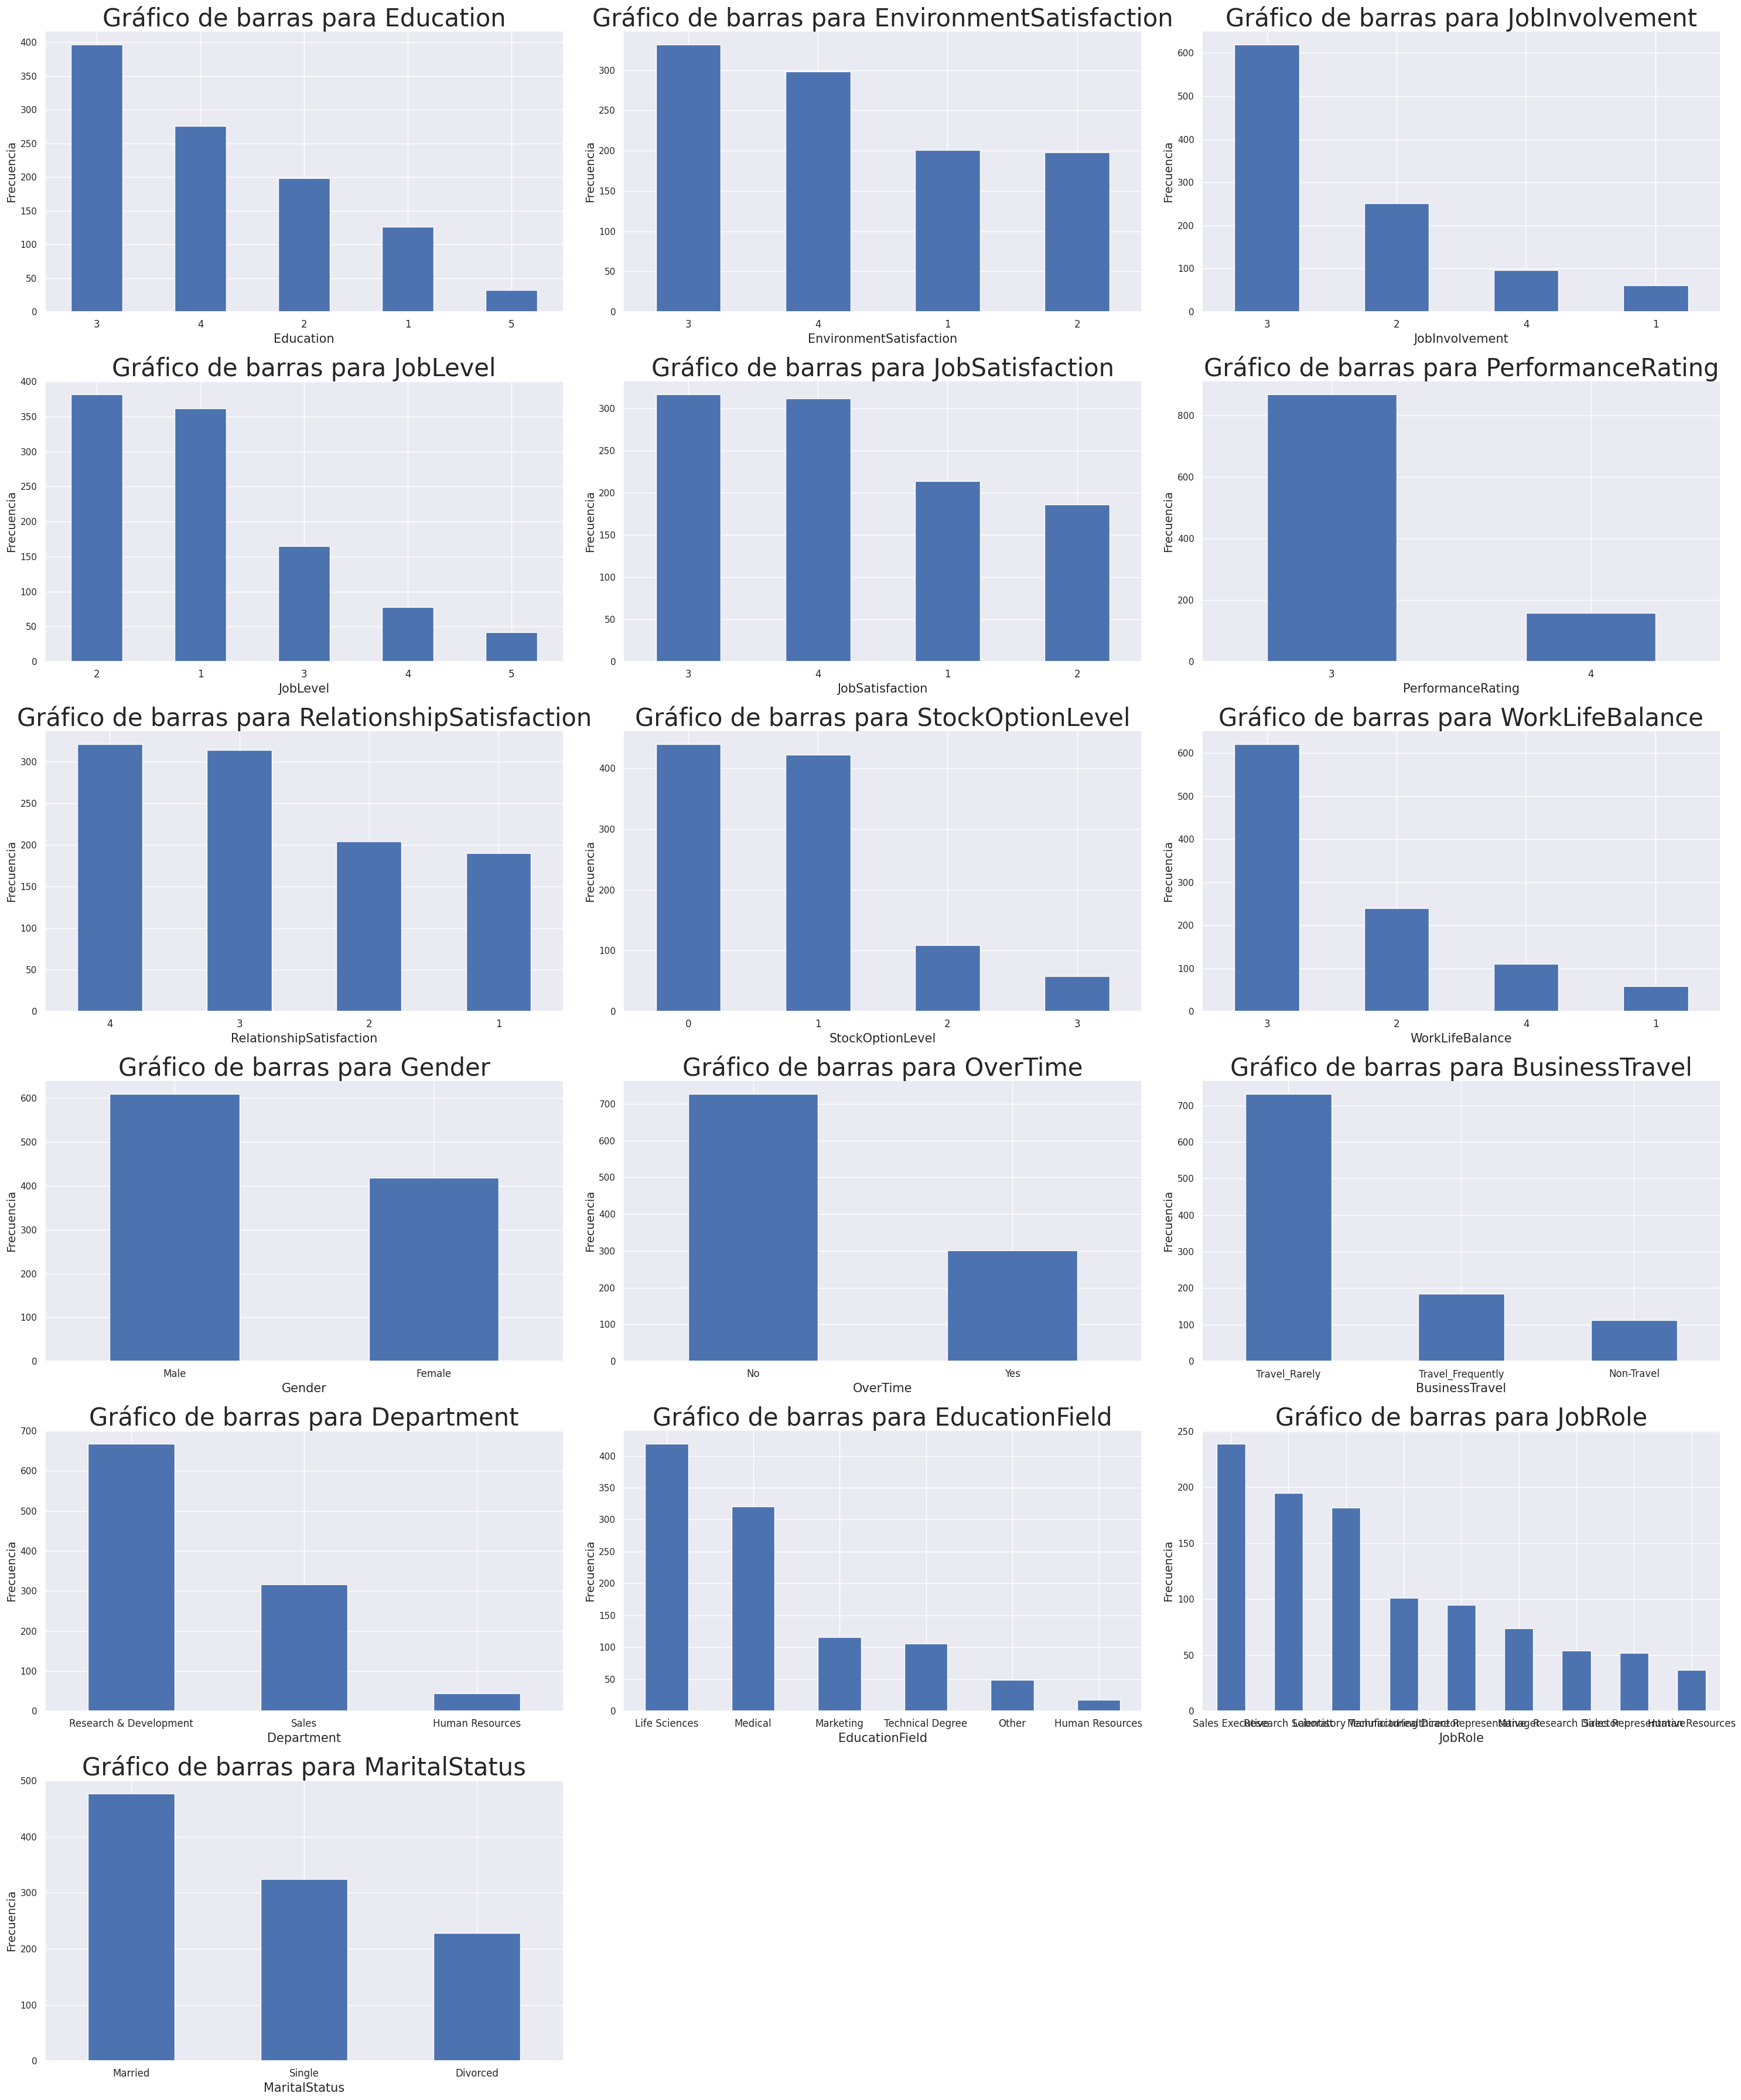

In [194]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Filtrar las columnas categóricas
Variables_categoricas = [ 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                         'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
                         'Gender', 'OverTime', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

Xtrain_categoricos = Xtrain[Variables_categoricas]

# Configurar el número de subgráficas
num_vars = len(Xtrain_categoricos.columns)
cols = 3  # Número de columnas en el marco
rows = (num_vars // cols) + (num_vars % cols > 0)  # Número de filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(30, 6 * rows))
axes = axes.flatten()  # Aplanar la lista de ejes para facilitar el acceso

# Crear gráficos de barras
for i, column in enumerate(Xtrain_categoricos.columns):
    Xtrain_categoricos[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Gráfico de barras para {column}', fontsize=30)
    axes[i].set_xlabel(column, fontsize=15)
    axes[i].set_ylabel('Frecuencia', fontsize=14)
    axes[i].tick_params(axis='x', rotation=0, labelsize=12)

# Eliminar ejes vacíos si hay algún sobrante
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#En cuanto a las variables categóricas se determina que hay nominales, binarias y ordinales.
#Se usará "OneHotEncoder" para las variables nominales y  para las variables Binarias, esto para reducir complejidad al modelo con mas columnas.


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

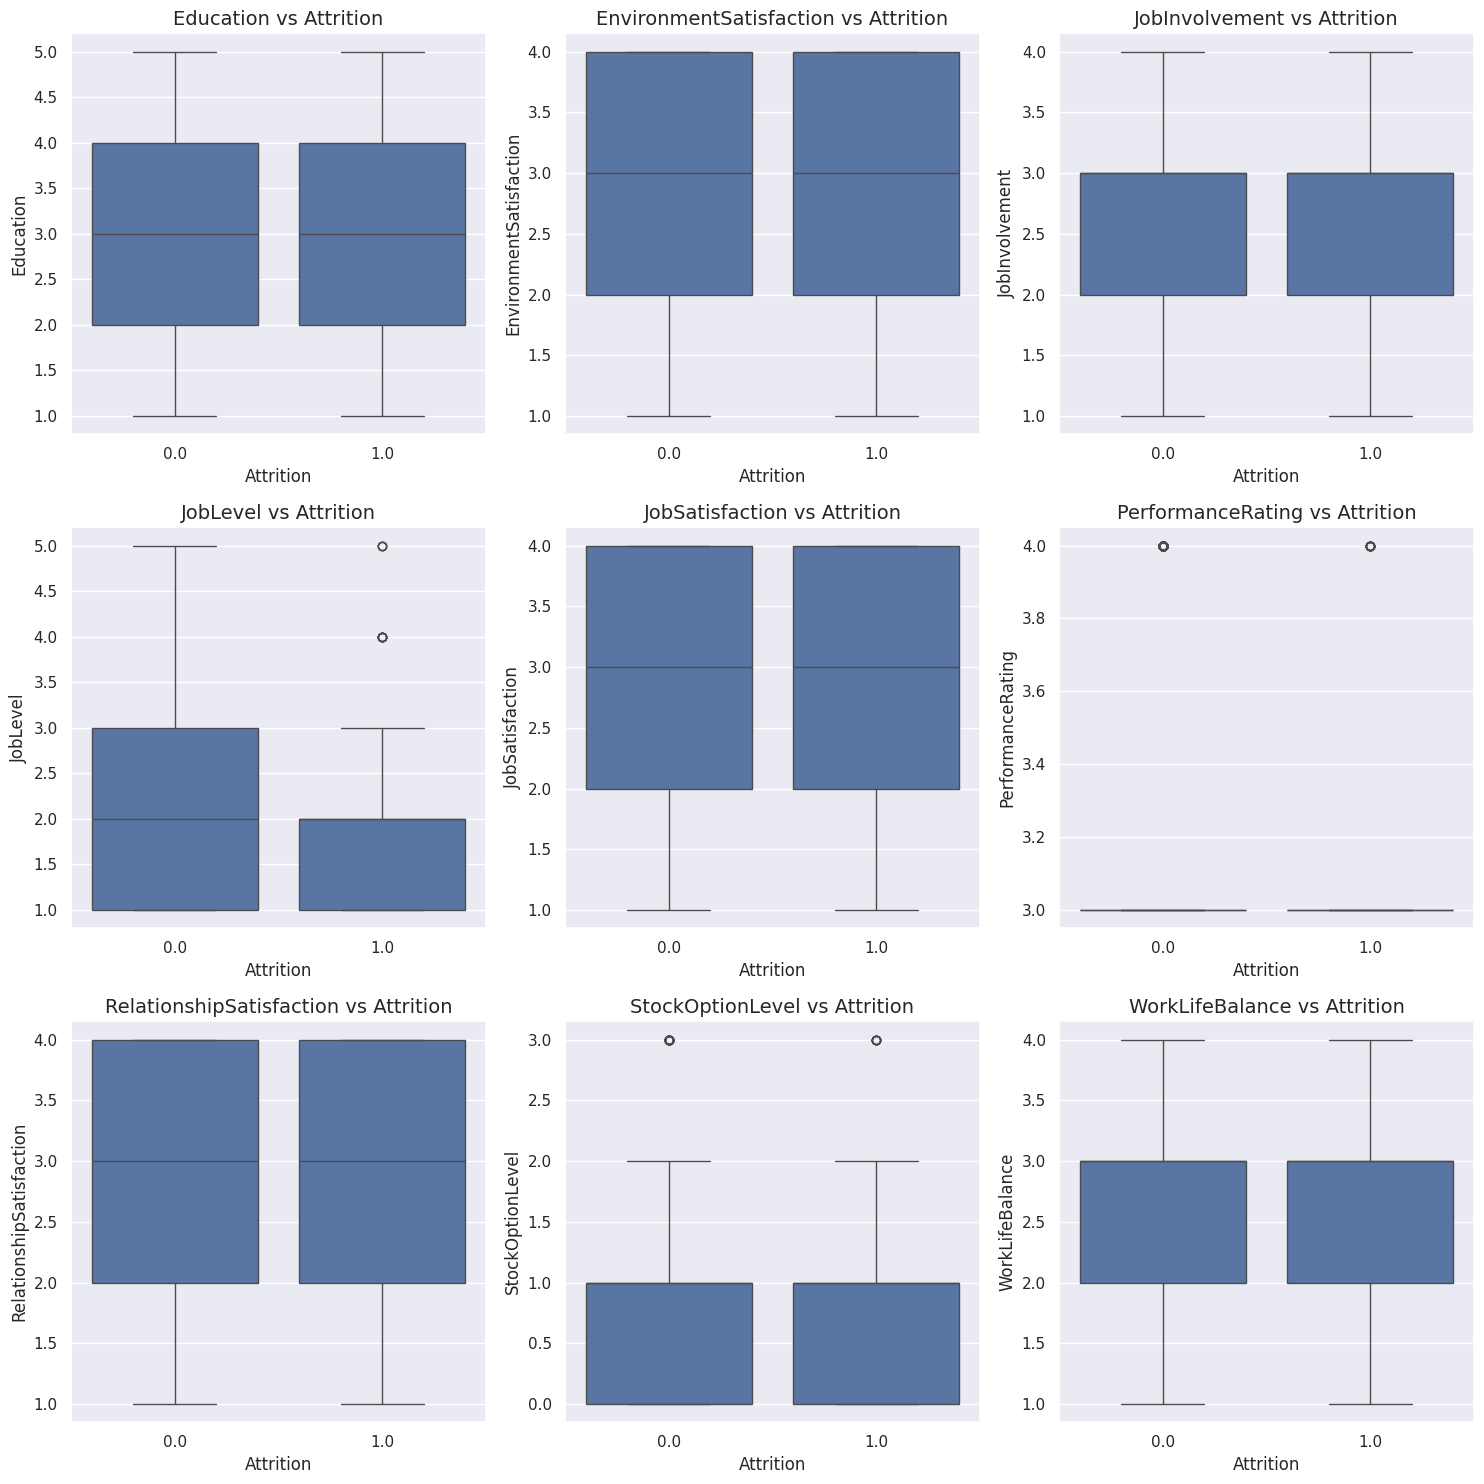

In [195]:
sns.set(rc={'figure.figsize':(9,6)})

#########################################################################
# Analisis de Correlación para variables categóricas ordinales
# Se concatenan los dataframes de variables y etiquetas de entrenamiento para evitar filtrado de información

# Lista de variables ordinales
variables_ordinales = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                       'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                       'StockOptionLevel', 'WorkLifeBalance']

# Concatenar Xtrain y ytrainT ('Attrition' esta en ytrainT)
datos = pd.concat([Xtrain, ytrainT], axis=1)

# Configurar el número de subplots
num_vars = len(variables_ordinales)
cols = 3  # Número de columnas
rows = (num_vars // cols) + (num_vars % cols > 0)  # Calcular el número de filas necesarias

# Crear una figura con subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Graficar un boxplot para cada variable ordinal
for i, variable in enumerate(variables_ordinales):
    sns.boxplot(x='Attrition', y=variable, data=datos, ax=axes[i])
    axes[i].set_title(f'{variable} vs Attrition', fontsize=14)
    axes[i].set_xlabel('Attrition', fontsize=12)
    axes[i].set_ylabel(variable, fontsize=12)

# Eliminar gráficos vacíos si hay más subplots que variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()


# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

# **Conclusiones del Análisis descriptivo de las gráficas:**

**Variables Numéricas:**


*->Las variables numéricas tienen diferentes escalas y en su mayoría tienen sesgo positivo.

*->Para las variables Numéricas se sugiere aplicar escalamiento Min-Max y posteriormente Box-Cox para reducir sesgos, esto debido a que todos los valores son mayores a cero.

*->No se pudo distinguir alguna correlación fuerte contra la variable dependiente attrition, queda pendiente analizar la relación contra las variables categóricas.

**Variables Categóricas:**

*->En cuanto a las variables categóricas se determina que hay nominales, binarias y ordinales.

*->Se usará "OneHotEncoder" para las variables nominales y  para las variables Binarias, esto para reducir complejidad al modelo con mas columnas.

*->La unica correlación detectada según análisis de box-plots con variables discretas vs la variable attrition es la de Job-Level, esto es algo que podremos detectar mas adelante con el análisis de importancia de los factores en el modelo.





# **Ejercicio 8:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**



In [196]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


# NUMÉRICAS:
numericas_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='median')), #Para datos faltantes se emplea la estrategía 'median' ya que mantiene la estructura de la distibución.
                ('scaling', MinMaxScaler(feature_range=(1, 4))), #Se ajustan las escalas,  ajusta el rango para no perder peso ante variables ordinales
                ('boxcox', PowerTransformer(method='box-cox', standardize=False)) #Se utiliza box-cox para eliminar sesgos, los valores son positivos por eso se emplea box-cox
              ])
numericas_pipeline_nombres = Variables_numericas

# ORDINALES:
catOrd_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')), #Solo en el caso de que existan valores faltantes se reemplazarn con los valores mas frecuentes para que el modelo tenga el mismo comportamiento.
                ('ordinal', OrdinalEncoder()) #Se emplea ordinal encoder para transformar las etiquetas a valores numéricos discretos, las variables tienen relacion de orden entre ellas por lo que la tranformacion ordinal encoder nos dará la mejor representación numérica.
                ])
catOrd_pipeline_nombres = [ 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                           'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# BINARIAS:
catBin_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')), #Solo en el caso de que existan valores faltantes se reemplazarn con los valores mas frecuentes para que el modelo tenga el mismo comportamiento.
                ('hot-encoding', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)) #Se emplea one-hot encoding con argumento drop first para ahorrar columnas y simplificar el df. La variable es binaria y obtendremos solo ceros y unos.
                  ])
catBin_pipeline_nombres = [ 'Gender', 'OverTime']

# NOMINALES:
catNom_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')), #Solo en el caso de que existan valores faltantes se reemplazarn con los valores mas frecuentes para que el modelo tenga el mismo comportamiento.
                ('one-hot-encoding', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)) # Se utiliza  One-Hot para transformar a valores entre 0 y 1 con drop first para disminuir cantidad de columnas y sparse=false para tener información completa en la matriz.
                ])
catNom_pipeline_nombres = [ 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


columnasTransformer = ColumnTransformer(transformers = [('numpipe', numericas_pipeline, numericas_pipeline_nombres),
                                                        ('ordpipe', catOrd_pipeline, catOrd_pipeline_nombres),
                                                        ('bipipe', catBin_pipeline, catBin_pipeline_nombres),
                                                        ('nompipe', catNom_pipeline, catNom_pipeline_nombres)],
                                        remainder='passthrough')

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 9:**

#### **Reagrupa los conjuntos de entrenamiento y validación en un solo DataFrame.**

#### **A estos nuevos DataFrame llamarlos Xtv y ytv.**

In [197]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


Xtv = pd.concat([Xtrain, Xval], ignore_index=True)
ytv = pd.concat([ytrainT, yvalT], ignore_index=True) #Se usa la variable de salida transformada


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

print(Xtv.shape)
print(ytv.shape)

(1249, 30)
(1249, 1)


# **Ejercicio 10:**

#### **Busca los mejores hiperparámetros.**

>> LR 0.878 (0.020)
Precisión en entrenamiento: 0.8982530530530529
Precisión en prueba: 0.8783186077643911
Diferencia porcentual: 2.22%
---
No hay sobreentrenamiento
---
No hay subentrenamiento
---
>> LASSO 0.879 (0.016)
Precisión en entrenamiento: 0.8965183183183182
Precisión en prueba: 0.8788497991967873
Diferencia porcentual: 1.97%
---
No hay sobreentrenamiento
---
No hay subentrenamiento
---
>> RIDGE 0.879 (0.021)
Precisión en entrenamiento: 0.8978527193860528
Precisión en prueba: 0.8788540829986614
Diferencia porcentual: 2.12%
---
No hay sobreentrenamiento
---
No hay subentrenamiento
---
>> EN 0.882 (0.015)
Precisión en entrenamiento: 0.8963180513847182
Precisión en prueba: 0.8823207496653281
Diferencia porcentual: 1.56%
---
No hay sobreentrenamiento
---
No hay subentrenamiento
---
>> kNN 0.846 (0.009)
Precisión en entrenamiento: 0.8703637637637637
Precisión en prueba: 0.8460080321285142
Diferencia porcentual: 2.80%
---
No hay sobreentrenamiento
---
No hay subentrenamiento
---


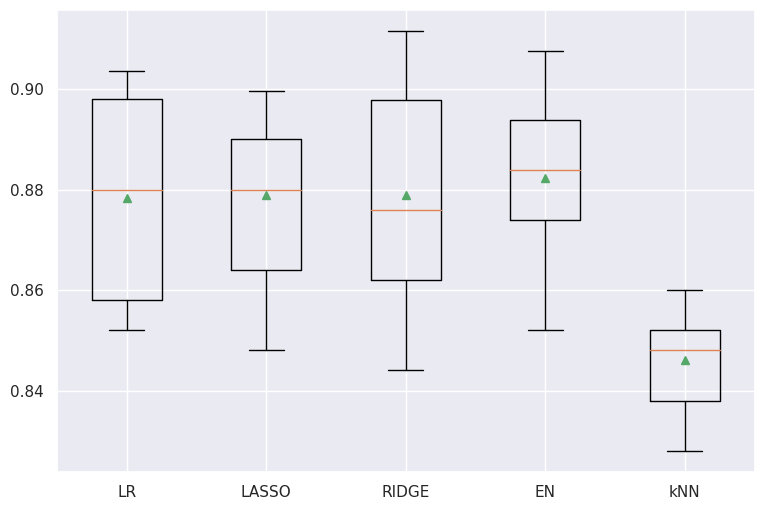

In [198]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    solver='lbfgs', max_iter=2000, # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    solver='liblinear', max_iter=2000, C=1.,# Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver='liblinear', max_iter=2000, C=10.01,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    l1_ratio=0.5, solver='saga', max_iter=4000, C=1.,  # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier(weights='uniform')) # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
  nombres.append('kNN')

  return modelos, nombres

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Entrenamos los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.


# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.

  # Realizamos la validación cruzada y obtenemos las métricas para detectar sobreentrenamietno o subentrenamiento
  cv_results = cross_validate(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1, return_train_score=True)

  # Diferencia entre entrenamiento y prueba
  train_accuracy = np.mean(cv_results['train_score'])
  test_accuracy = np.mean(cv_results['test_score'])

  # Cálculo del porcentaje de diferencia para sobreentrenamiento
  diferencia_porcentaje = ((train_accuracy - test_accuracy) / train_accuracy) * 100


  #Se imprimen los resultados de las pruebas
  print(f'Precisión en entrenamiento: {train_accuracy}')
  print(f'Precisión en prueba: {test_accuracy}')
  print(f'Diferencia porcentual: {diferencia_porcentaje:.2f}%')
  print('---')
  if diferencia_porcentaje > 3: #Se considera sobreentrenamiento cuando la diferencia del score entre conjunto de validación y entrenamiento es mayor al 3%
    print('Hay sobreentrenamiento')
  else:
    print('No hay sobreentrenamiento')
  print('---')
  if test_accuracy >= .8: #Se considera un modelo subentrenado con una precisión menor al 80%
    print('No hay subentrenamiento')
  else:
    print('Hay subentrenamiento')
  print('---')


plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()

# **Ejercicio 11:**

#### **Utilizando el mejor modelo y los datos Xtv, ytv, realiza una búsqueda de malla para encontrar los mejores hiperparámetros. Verifica que el modelo no esté subentrenado o sobreentrenado.**



In [199]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++


mejor_modelo = LogisticRegression(penalty='elasticnet', solver='saga') #Este fue el modelo con mejor desempeño

dicc_grid = {'C':[ 0.5, 1, 3, 7],
             'l1_ratio':[ 0.2, 0.5, 0.8],
             'max_iter': [100, 1000, 10000]
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)

grid = GridSearchCV(estimator=mejor_modelo,
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring='accuracy',  # podemos seleccionar otras métricas: 'accuracy', 'f1', 'precision', 'recall'
                    n_jobs=-1,
                    return_train_score=True    # podemos obtener los de entrenamiento para verificar sobreentrenamiento.
                    )

Xx = columnasTransformer.fit_transform(Xtv)

grid_result = grid.fit(Xx, np.ravel(ytv))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


Mejor modelo: 0.884971 usando {'C': 3, 'l1_ratio': 0.5, 'max_iter': 1000}
Promedios Train mean(std): 0.8966(0.0043)
Promedios Val mean(std): 0.8829(0.0142)


# **Ejercicio 12:**

#### **Con los mejores valores de hiperparámetros del mejor modelo encontrado, obtener:**

*   #### **a) Matriz de Confusión.**
*   #### **b) Análisis de Imprtancia de Factores.**
*   #### **c) Reporte de métricas.**

In [200]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
# Incluye todas las celdas que consideres adecuado para responder
# estos tres incisos del ejercicio.
#A) Accuracy y Matriz de confusión

modelo_mejor = LogisticRegression(penalty='elasticnet',
                                  l1_ratio=0.5,
                                  max_iter=1000,
                                  solver='saga',
                                  C=3.0,
                                  random_state=1)

#Se transforman los datos de entrenamiento
Xtrainx = columnasTransformer.fit_transform(Xtrain)

#Entrenamos el modelo con datos de entrenamiento
mejor_result = modelo_mejor.fit(Xtrainx, np.ravel(ytrainT))

#Se transforman los datos de validación
Xvalidacion = columnasTransformer.fit_transform(Xval)
#Probamos el Modelo
print("Accuracy: {:.4f}".format(mejor_result.score(Xvalidacion, np.ravel(yvalT))))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

Accuracy: 0.8682


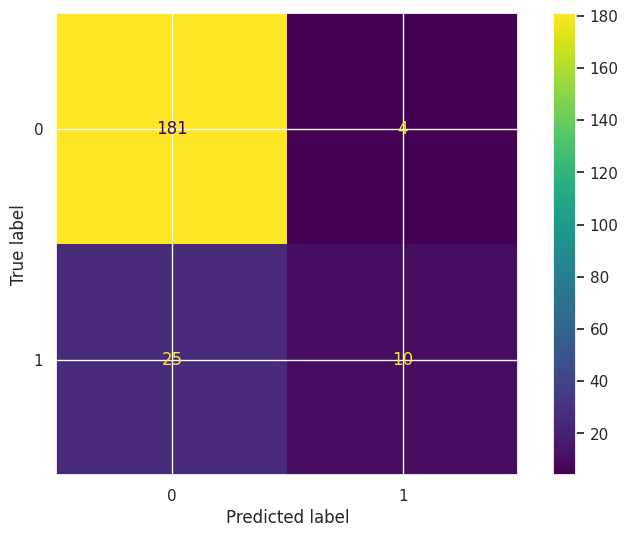

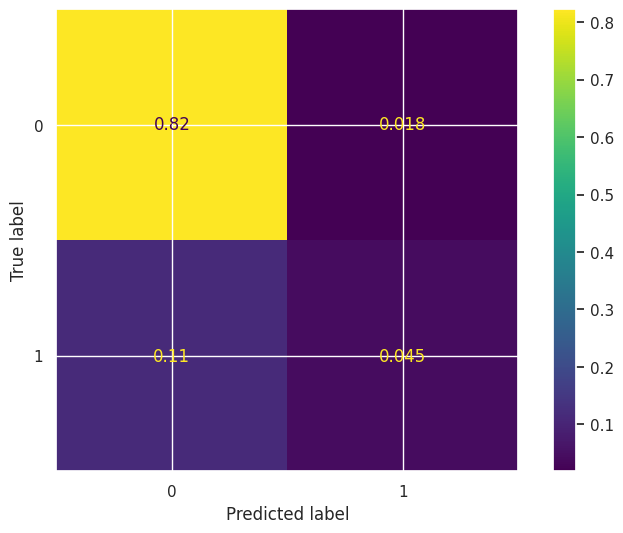

In [201]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

# matriz de confusión:
ConfusionMatrixDisplay.from_estimator(mejor_result, Xvalidacion, np.ravel(yvalT))
plt.show()

#matriz de confusión normalizada:
ConfusionMatrixDisplay.from_estimator(mejor_result, Xvalidacion, np.ravel(yvalT), normalize='all')
plt.show()


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

In [202]:

# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
#B)Realiza un análisis de importancia defactores,indicando cuales son losfactores que
#ayudan a explicar mejor la variabilidad de la variable de salida.

# Para obtener los coeficientes más importantes del mejor modelo obtenido:
mejor_result.coef_


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

array([[ 2.14110986, -0.55421545, -0.98263643, -0.21697899,  1.22963717,
        -0.0990982 , -3.07627336,  0.09075369, -0.33787802, -2.54238253,
         0.46475207, -0.96622093,  2.46088214, -0.95964275,  0.0308578 ,
        -0.42742195, -0.51701137,  0.55819387, -0.38794084,  0.12556016,
        -0.34140496, -0.39698163, -0.40826704,  0.30822981,  1.869111  ,
         1.71988769,  0.7652134 ,  0.        ,  0.        , -0.41841257,
        -0.17230057, -0.44266622, -1.05024926,  0.04205156,  1.09417629,
         1.27864491,  0.15725663,  0.        , -1.29352766,  0.        ,
         1.06052307,  1.67932301,  0.090424  ,  0.77998536]])

In [203]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
# Obteniendo nombres de los factores:
factoresDf = pd.DataFrame(data = mejor_result.coef_.reshape(-1,1),
             index = columnasTransformer.get_feature_names_out())

factoresDf.columns = ['Coeficientes']
factoresDf

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

,Coeficientes
numpipe__NumCompaniesWorked,2.141110
numpipe__TrainingTimesLastYear,-0.554215
numpipe__Age,-0.982636
numpipe__DailyRate,-0.216979
numpipe__DistanceFromHome,1.229637
numpipe__HourlyRate,-0.099098
numpipe__MonthlyIncome,-3.076273
numpipe__MonthlyRate,0.090754
numpipe__PercentSalaryHike,-0.337878
numpipe__TotalWorkingYears,-2.542383


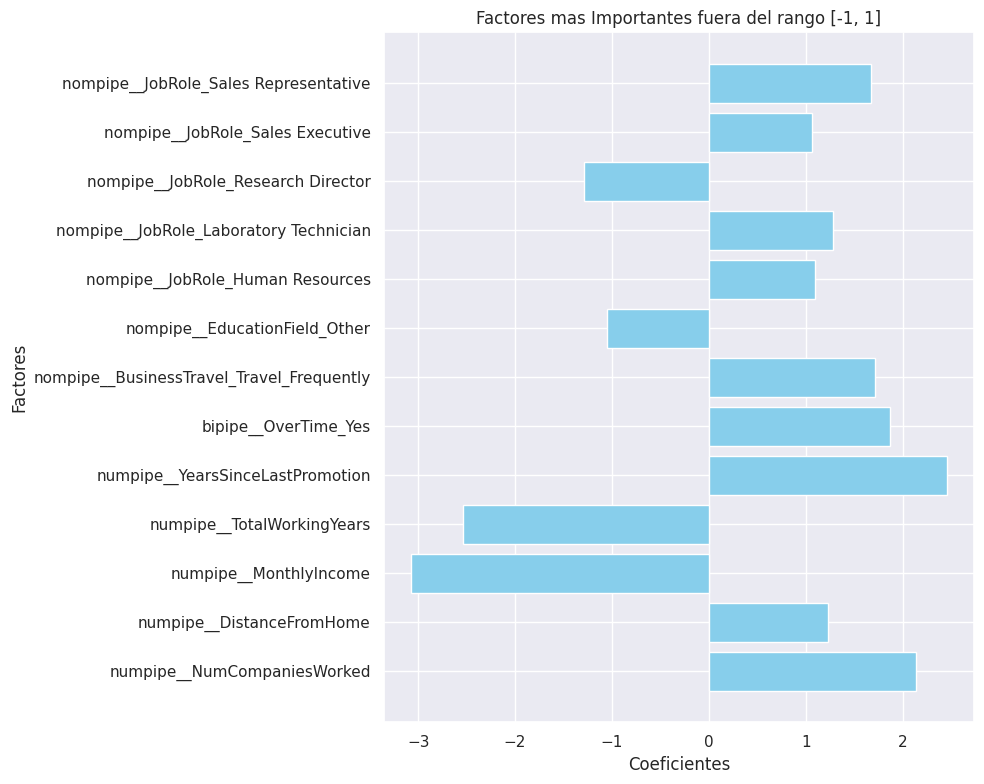

In [204]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
#Análisis de los coeficientes mas importantes
# Filtrar los valores menores a -1 o mayores a 1

#Filtrando los principales valores
filtro_coef = factoresDf[(factoresDf['Coeficientes'] < -1) | (factoresDf['Coeficientes'] > 1)]

# Crear una gráfica de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(filtro_coef.index, filtro_coef['Coeficientes'], color='skyblue')

# Etiquetas y título
plt.xlabel('Coeficientes')
plt.ylabel('Factores')
plt.title('Factores mas Importantes fuera del rango [-1, 1]')

# Mostrar la gráfica
plt.tight_layout()
plt.show()
# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

Se puede observar que dentro de los 13 factores mas importantes, los de mayor impactos para la clase positiva son:

1.- Número de años desde la última promoción.
2.- Número de compañias en las que se ha trabajado.
3.- Si los individuos tenían tiempo extra.


In [205]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
#C)Obtene run reporte del modelo obtenido con elmétodo classification_report de
#scikit-learn.

from sklearn.metrics import classification_report

#Con el modelo ya entrenado con base a los datos de entrenamiento y
#con los datos de validación

# Obtener predicciones
y_pred = mejor_result.predict(Xvalidacion)

# Generar el reporte
reporte = classification_report(yvalT, y_pred)
print(reporte)

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       185
           1       0.71      0.29      0.41        35

    accuracy                           0.87       220
   macro avg       0.80      0.63      0.67       220
weighted avg       0.85      0.87      0.84       220



# **Ejercicio 13**

#### **Obtener el desempeño final del modelo (accuracy) con el conjunto de prueba (test).**

In [206]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++


#Se transforman los datos de prueba
Xprueba = columnasTransformer.fit_transform(Xtest)

#Probamos el Modelo
print("Accuracy with Test Data: {:.4f}".format(mejor_result.score(Xprueba, np.ravel(ytestT))))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

Accuracy with Test Data: 0.8778


# **Ejercicio 14**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++
# **CONCLUSIONES:**

El caso de estudio tiene un problema de desbalanceo detectado al inicio con cerca del 80% de los valores pertenecientes a una de las 2 clases. Este desbalanceo implica una dificultad para que el modelo pueda predecir valores que pertenezcan a la clase con menor cantidad de valores (clase positiva). Por lo tanto es de vital importancia que los muestreos consideren la estratificación en base a la etiqueta 'Attrition' para poder asegurar que cada muestra represente el comportamiento de todos los datos.

En los análisis descriptivos de las variables numéricas y categóricas no se observó una correlación predominante con alguna variable en especifico, esto indicaba que las razones que tenían los empleados para cambiar de empleo podían ser variadas, por lo que era de esperarse que en el modelo veriamos una combinación de varios factores con pesos similares.

En las variables numéricas se pudo observar que tenían escalas diferentes y sesgos positivos por lo que se optó por aplicar escalamiento y transformación Box-Cox para normalizar y eliminar sesgos. En cuanto a las variables categóricas se encontraron del tipo nominal, ordinal y binarias considerando dos tipos de transformaciones la ordinal y la one-hot-encoding respectivamente.

Al final los factores de mayor contribución para la rotación según los coeficientes del modelo son:

1.- Número de años desde la última promoción.
2.- Número de compañias en las que se ha trabajado.
3.- Si los individuos tenían tiempo extra.

El recall es bastante bajo para la predicción de la clase positiva (si), esto puede deberse al desbalanceo o quizá algún factor que este faltando de considerar para que el modelo pueda tener más recursos con el fín de poder predecir la variable positiva de forma más precisa.

El ejercicio estuvo bastante completo, me ayudó a comprender de una manera mas general lo que el análisis de datos y formulación de un modelo para poder explicar un comportamiento pueden hacer.

Referencias:
Géron, Aurélien (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition
Jafari, R. (2022). Hands-On Data Preprocessing in Python.


#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<